# Exercici dplyr i ggplot2

## 1. Inici 
### a) Instal·la el paquet _nycflights13_
### b) Carrega el paquet _nycflights13_

In [3]:
install.packages("nycflights13")


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [ ]:
library(nycflights13)

En el context de l'exercici, també necessitarem els paquets dplyr, ggplot2 i maps:

In [10]:
install.packages(c("dplyr", "ggplot2", "maps"))

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [15]:
library(dplyr)
library(ggplot2)
library(maps)

Carrega la base de dades adequada (la que conté les variables d’interès), assigna-la a _vols_ i investiga-la una mica amb str(), head(), summary().
L'assignem a una variable diferent (_vols_) a l'original perquè així podem modificar-la sense malmetre les dades oringals, allò que en anglès es diu _raw data_. 

In [4]:
vols <- flights

In [8]:
head(vols, 10)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00
2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00


In [5]:
str(vols)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	336776 obs. of  19 variables:
 $ year          : int  2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ month         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ day           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ dep_time      : int  517 533 542 544 554 554 555 557 557 558 ...
 $ sched_dep_time: int  515 529 540 545 600 558 600 600 600 600 ...
 $ dep_delay     : num  2 4 2 -1 -6 -4 -5 -3 -3 -2 ...
 $ arr_time      : int  830 850 923 1004 812 740 913 709 838 753 ...
 $ sched_arr_time: int  819 830 850 1022 837 728 854 723 846 745 ...
 $ arr_delay     : num  11 20 33 -18 -25 12 19 -14 -8 8 ...
 $ carrier       : chr  "UA" "UA" "AA" "B6" ...
 $ flight        : int  1545 1714 1141 725 461 1696 507 5708 79 301 ...
 $ tailnum       : chr  "N14228" "N24211" "N619AA" "N804JB" ...
 $ origin        : chr  "EWR" "LGA" "JFK" "JFK" ...
 $ dest          : chr  "IAH" "IAH" "MIA" "BQN" ...
 $ air_time      : num  227 227 160 183 116 150 158 53 140 138 ...
 $ distanc

In [7]:
summary(vols)

      year          month             day           dep_time    sched_dep_time
 Min.   :2013   Min.   : 1.000   Min.   : 1.00   Min.   :   1   Min.   : 106  
 1st Qu.:2013   1st Qu.: 4.000   1st Qu.: 8.00   1st Qu.: 907   1st Qu.: 906  
 Median :2013   Median : 7.000   Median :16.00   Median :1401   Median :1359  
 Mean   :2013   Mean   : 6.549   Mean   :15.71   Mean   :1349   Mean   :1344  
 3rd Qu.:2013   3rd Qu.:10.000   3rd Qu.:23.00   3rd Qu.:1744   3rd Qu.:1729  
 Max.   :2013   Max.   :12.000   Max.   :31.00   Max.   :2400   Max.   :2359  
                                                 NA's   :8255                 
   dep_delay          arr_time    sched_arr_time   arr_delay       
 Min.   : -43.00   Min.   :   1   Min.   :   1   Min.   : -86.000  
 1st Qu.:  -5.00   1st Qu.:1104   1st Qu.:1124   1st Qu.: -17.000  
 Median :  -2.00   Median :1535   Median :1556   Median :  -5.000  
 Mean   :  12.64   Mean   :1502   Mean   :1536   Mean   :   6.895  
 3rd Qu.:  11.00   3rd Qu.:1

## 2. Retard vs. Temps
### a) Crea una nova variable _time_ dins la base de dades _vols_, que contingui l’hora i minut com un sol valor decimal (de l’estil 1.01, 1.10, 1.50 hores).

In [16]:
vols$time <- vols$hour + vols$minute / 60

Comprovem que la nostra nova columna s'ha afegit al final (a la dreta) de la nostra _dataframe_:

In [17]:
head(vols, 5)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,time
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00,5.250000
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00,5.483333
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00,5.666667
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00,5.750000
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00,6.000000


### b) Calcula el retard mitjà i el nombre de vols per hora per a cada valor de _time_ diferent. El resultat hauria de ser una dataframe anomenada _retard.per.hora_ de 3 columnes, _time_, _retard_ i _n_, amb tantes files com valors de _time_ diferents existeixin. Utilitzar el paquet _**dplyr**_ facilita les coses!

In [22]:
retard.per.hora <- summarise(group_by(vols, time), 
                            retard = mean(arr_delay, na.rm=TRUE), n=n())

Fixeu-vos en com hem afegit l'argument _na.rm=TRUE_ a la funció _mean_, que serveix per ignorar els valors _NA_.

### c) Visualitza el resultat.

In [24]:
head(retard.per.hora, 20)

time,retard,n
1.100000,NaN,1
5.000000,-6.476471,341
5.016667,-12.000000,1
5.083333,-26.500000,2
5.166667,-15.600000,5
5.250000,-9.551220,208
5.266667,-25.750000,4
5.283333,-2.888889,28
5.333333,-17.142857,7
5.416667,-2.432432,37


### d) Grafica el retard mitjà versus el temps. Escala la mida dels punts segons el nombre de vols. Quines conclusions se’n poden treure?

Warning message:
“Removed 1 rows containing missing values (geom_point).”

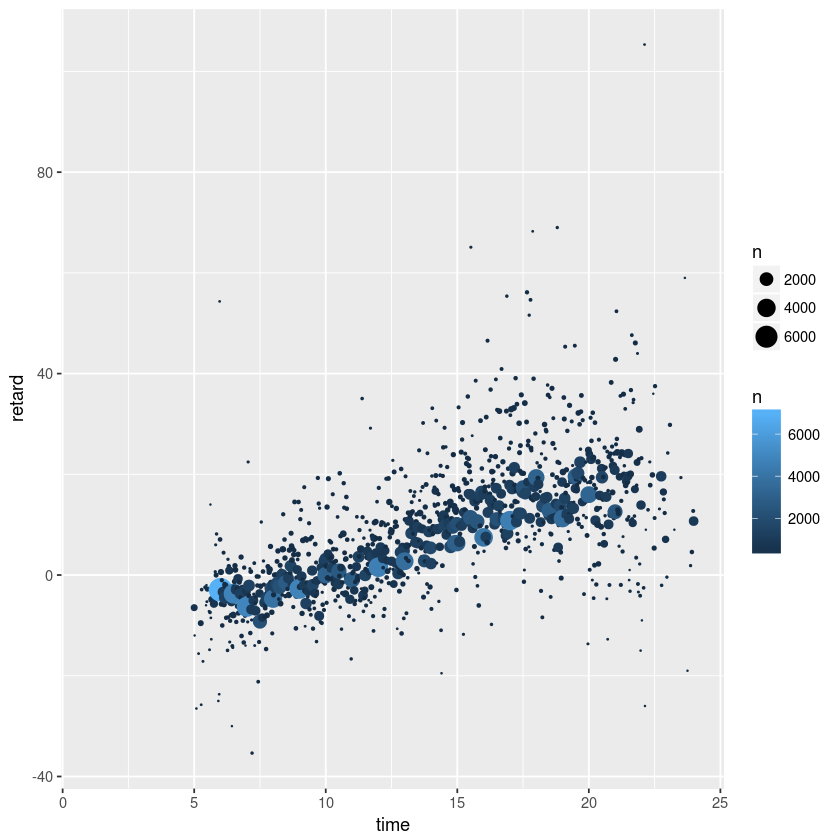

In [26]:
ggplot(data = retard.per.hora, aes(time, retard, size = n, color = n)) +
  geom_point() + scale_size_area()

Sembla que es pot intuir una relació positiva entre el retard i l'hora de sortida del vol: com més tard surt el vol, amb més retard sembla portar.

## 3. Retard vs. Destí

### a) De manera similar a com s’ha construit la dataframe “retard.per.hora” construirem una dataframe anomenada _retard.per.dest_. El resultat serà una dataframe amb 3 columnes, _dest_, _retard_ i _n_ que contenen, respectivament, el nom de la destinació del vol, el retard del vol i el nombre de vols que han volat a cada destinació. La dataframe tindrà tantes files com destinacions diferents hi hagi.

La pista és que ho fem _de manera similar_. Podem copiar i enganxar el codi anterir i modificar-lo perquè s'adapti al nou problema.

In [27]:
retard.per.dest <- summarise(group_by(vols, dest),
                            retard = mean(arr_delay, na.rm = TRUE), n = n())

### b) Visualitza _retard.per.dest_.

Fixeu-vos en com hem afegit l'argument _na.rm=TRUE_ a la funció _mean_, que serveix per ignorar els valors _NA_.

In [28]:
head(retard.per.dest, 20)

dest,retard,n
ABQ,4.381890,254
ACK,4.852273,265
ALB,14.397129,439
ANC,-2.500000,8
ATL,11.300113,17215
AUS,6.019909,2439
AVL,8.003831,275
BDL,7.048544,443
BGR,8.027933,375
BHM,16.877323,297


### c) Uneix-li la informació d’aeroports (noms i llocs en forma de latitud i longitud). Es pot fer mitjançant la comanda _left_join_ del paquet _dplyr_ o bé amb la comanda _merge_ de R base.  Cal tenir en compte que en una dataframe els noms dels aeroports de destinació estan a la variable _dest_ i en l'altra a la variable _faa_.

Podem utilitzar la següent construcció (en _dplyr_):

retard.per.dest <- left\_join(x = retard.per.dest, y = ...,
                             by = c("dest" = "faa"))

Com a l'inici, convé primer guardar la informació d'aeroports, que es troba a _airports_ en una variable nostra, que anomenarem _aeroports_.

In [29]:
aeroports <- airports

In [30]:
retard.per.dest <- left_join(x = retard.per.dest, y = aeroports,
                                   by = c("dest" = "faa"))

En base R seria:

In [33]:
retard.per.dest <- merge(x = retard.per.dest, y = aeroports,
                          by.x = "dest", by.y = "faa",
                          all.x = TRUE, all.y = FALSE)

Tots els dos codis anteriors fan el mateix.

### d) Grafica latitud versus longitud i escala la mida dels punts segons el nombre de vols.

Recorda l'estructura bàsica d'una crida a ggplot:

ggplot(data = ..., aes(..., ..., size = ...)) + geom\_point()

Warning message:
“Removed 4 rows containing missing values (geom_point).”

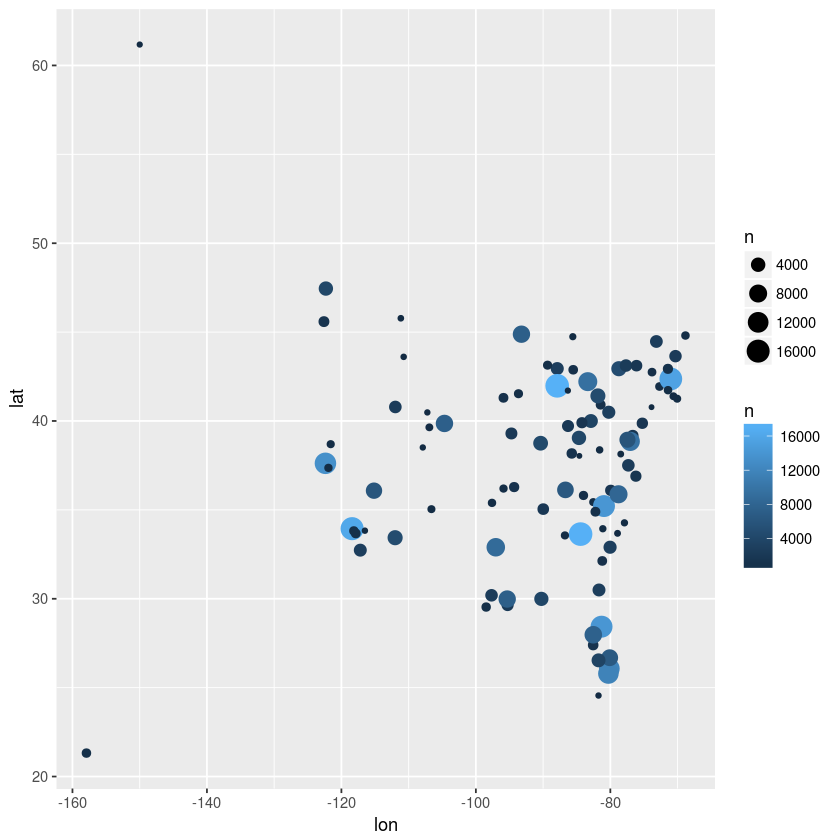

In [35]:
ggplot(data = retard.per.dest, aes(lon, lat, size = n, color = n)) + geom_point()

També podem afegir _color = n_ per pintar els punts amb tonalitats de blau segons tinguin una _n_ major o menor.

### e) Afegeix un mapa dels Estats Units sobre el gràfic. Instal·la i carrega el paquet _maps_. Afegeix "+ borders() + geom\_point()" a la crida del gràfic per mostrar el mapa del món i "+ borders(database = "state", size = 0.5) + geom\_point()" per mostrar només el mapa dels Estats Units.

Warning message:
“Removed 4 rows containing missing values (geom_point).”

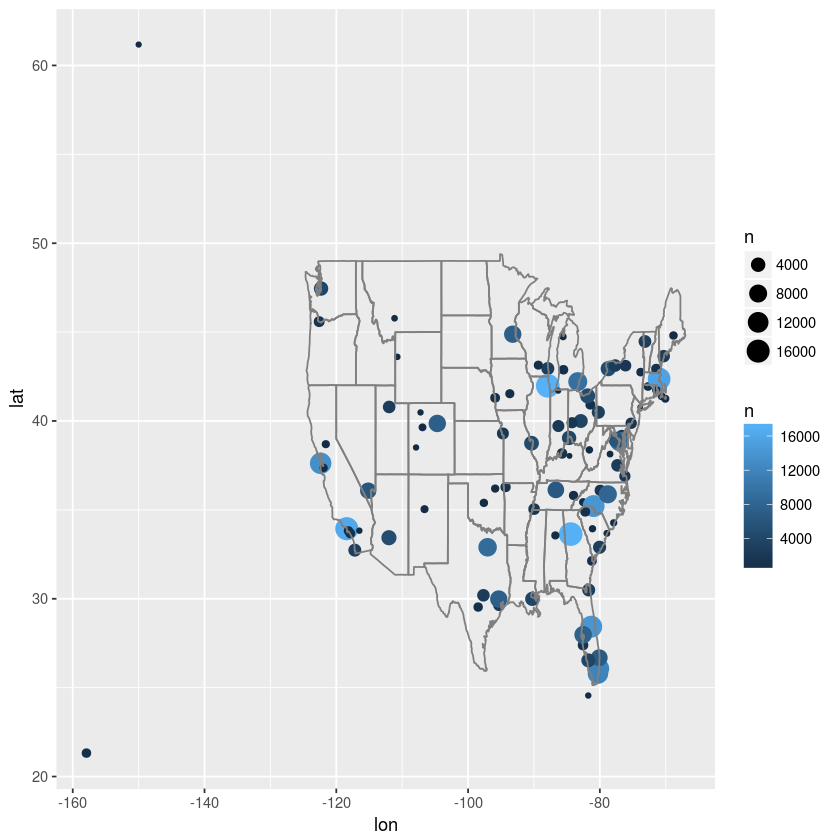

In [41]:
ggplot(data = retard.per.dest, aes(lon, lat, size = n, color = n)) +
geom_point() + borders(database = "state", size = 0.5)

Warning message:
“Removed 4 rows containing missing values (geom_point).”

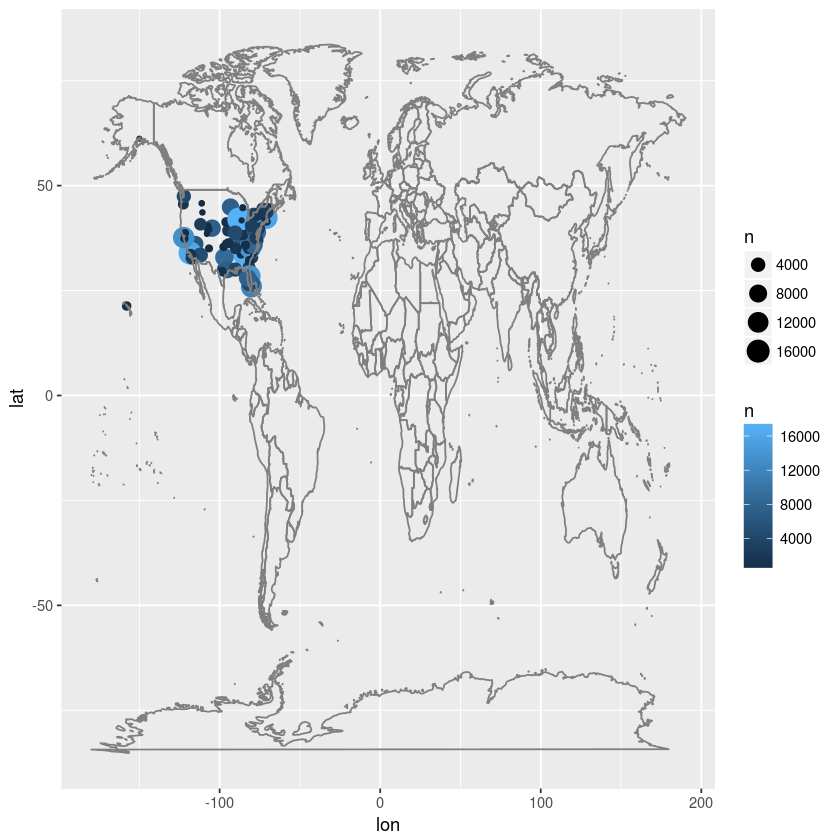

In [38]:
ggplot(data = retard.per.dest, aes(lon, lat, size = n, color = n)) +
geom_point() + borders()